In [1]:
%matplotlib inline

## [ONE]

Using the Friedmann equation, find values of $\Omega_{m}, \Omega_{r}, \Omega_{\Lambda}$ that will give rise to a:

a) Loitering universe (use a universe with a positive matter density)
    
b) A big crunch universe
    
Plot your results showing the scale factor as a function of time.

Age of universe =  16.2233003895  Gyrs


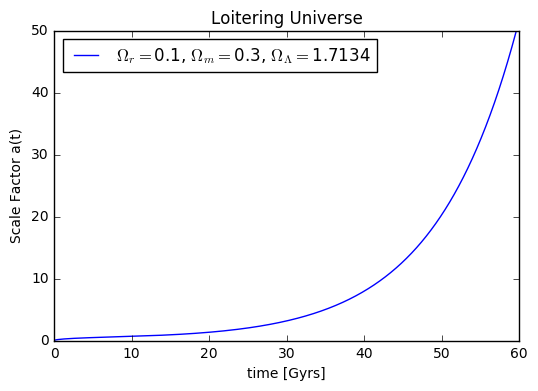

In [2]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

#Setting my variables
H = 70 * (3.241*(10**-20)) #Change units if needed.
r = 0.1
m = 0.3
l = 1.7134
t = r + m + l

#Define the Friedmann equation
def age(a):
    return (r/(a**2) + (m/a) + (l)*(a**2) + (1-t))**(-0.5)

#Loop through time to get values of the integrals.
scale_factor = np.linspace(0,50,1000)
time = []
for i in scale_factor:
    if i == 0.0:
        time.append(0.0)
        continue
    else:
        solution = integrate.quad(age, 0, i)[0]* (1/H) * (1/(3.154*10**7)) / (10**9)
        time.append(solution)
time = np.array(time)
    
#Get the age of this universe, just because. 
sol = integrate.quad(age, 0, 1)
new_age = sol[0] * (1/H) * (1/(3.154*10**7)) / (10**9)
print 'Age of universe = ', new_age, ' Gyrs'

#Plot the scale factor versus time: 
plt.plot(time, scale_factor, label = r'$\Omega_{r}=$'+str(r)+r', $\Omega_{m}=$'+str(m)+r', $\Omega_{\Lambda}=$'+str(l))
plt.ylabel('Scale Factor a(t)')
plt.xlabel('time [Gyrs]')
plt.legend(loc = 2)
plt.title('Loitering Universe')

For a big crunch universe, $\Omega_{0} > 1$.

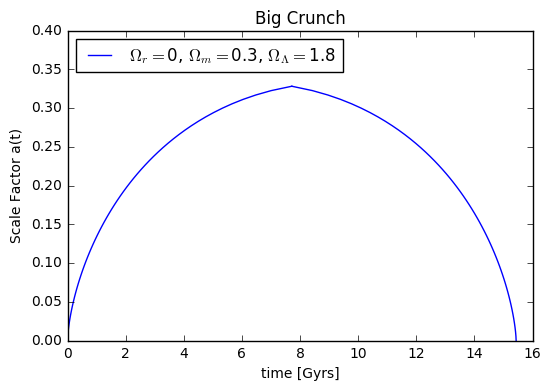

In [3]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

#Setting my variables
H = 70 * (3.241*(10**-20)) #Change units if needed.
r = 0
m = 0.3
l = 1.8
t = r + m + l

#Define the Friedmann equation
def age(a):
    return (r/(a**2) + (m/a) + (l)*(a**2) + (1-t))**(-0.5)

#Loop through time to get values of the integrals, only up until the maximum scale factor. This value pulled from Ryden.
scale_factor = np.linspace(0, .56, 100)
time = []
for i in scale_factor:
    if i == 0.0:
        time.append(0.0)
        continue
    else:
        try:
            solution = integrate.quad(age, 0, i)[0]* (1/H) * (1/(3.154*10**7)) / (10**9)
            time.append(solution)
        except ValueError:
            pass
time = np.array(time)
scale = scale_factor[:len(time)] 
x_m = np.max(time)

#Need to mirror the data
time_mirrored = []
for i in time:
        delta_x = x_m - i
        mirrored_x = i + 2.0*delta_x
        time_mirrored.append(mirrored_x)
time_mirrored = np.array(time_mirrored)

#Plot the scale factor versus time:
plt.plot(time, scale, label= r'$\Omega_{r}=$'+str(r)+r', $\Omega_{m}=$'+str(m)+r', $\Omega_{\Lambda}=$'+str(l))
plt.plot(time_mirrored, scale, c = 'blue')
plt.ylabel('Scale Factor a(t)')
plt.xlabel('time [Gyrs]')
plt.ylim(0,0.4)
plt.legend(loc = 2)
plt.title('Big Crunch')

This graph has a slight point at the top of the plot, right where the two mirrored sides meet. This is due to the fact that I had to mirror the data, and at that point, the integral could not be evaluated. So I stopped the integral at that point and mirrored the data, which is what is producing this strange break at the top. Ideally, the top would be smoothed out.

## [TWO]

If a cluster of galaxies has a set of gravitational arcs (e.g. Einstein rings) we can use these arcs to calculate the mass internal to the inscribed circle. If we assume an isothermal sphere, show that the velociy dispersion of the cluster is related to the angle of the arc in the image by

\begin{equation}
    \sigma_{v} \approx 10^{3} km s^{-1} \left ( \frac{\theta D_{s}}{28^{''} D_{LS}} \right )^{1/2}
\end{equation}

An isothermal sphere has a density profile $\rho(r) = \frac{\sigma_{v}^{2}}{2\pi G r^{2}}$

Hint: think about the mass within the Einstein radius.

Starting with the density profile, the surface mass density needs to be calculated in order to determine $\sigma_{v}$ in terms of $\theta$. Breaking r up into 2 components, x and z, where x is the radial distance from the center of the lens to the source, and z is the vertical distance, perpendicular to the lens image, it can be rewritten as:

\begin{equation}
    r^{2} = x^{2} + z^{2}
\end{equation}

Plugging this into the density profile, and integrating over z from negative infinity to infinity yields $\Sigma$, the surface density:

\begin{equation}
    \Sigma = \int_{-\infty}^{\infty} \frac{\sigma^{2}_{v}}{2 \pi G (x^{2} + z^{2})} dz
\end{equation}

\begin{equation}
    \Sigma = \frac{\sigma^{2}_{v}}{2 G x}
\end{equation}

Now taking sigma, and integrating over the total area of the lens, gives the total integrated mass for the lens: 

\begin{equation}
    M = \int_{0}^{x} 2 \pi x' \Sigma dx'
\end{equation}

\begin{equation}
    M = \frac{\pi \sigma^{2}_{v} x}{G}
\end{equation}

x can be rewritten in terms of the distance to the lens and the angle from the observer to the image on the lens as:

\begin{equation}
    \theta \approx \frac{x}{D_{L}}
\end{equation}

\begin{equation}
    x \approx \theta D_{L}
\end{equation}

Assuming lens produces a perfect Einstein ring, $\theta$ in the above equation equals $\theta_{E}$.

Looking at the equation for the Einstein ring, I can relate $\sigma_{v}$ to $\theta_{E}$, using the total integrated lens mass and the approximation for x:

\begin{equation}
    \theta_{E}^{2} = \frac{4GM(< \theta_{E})}{c^{2}} \frac{D_{LS}}{D_{L}D_{S}}
\end{equation}

\begin{equation}
    \theta_{E}^{2} = \frac{4G}{c^{2}} \frac{\pi \sigma_{v}^{2}}{G} D_{L} \theta_{E} \frac{D_{LS}}{D_{L}D_{S}}
\end{equation}

Simplifying and solving for $\sigma_{v}$ yields:

\begin{equation}
    \sigma_{v} = c \left ( \frac{\theta_{E}}{4 \pi} \frac{D_{S}}{D_{LS}} \right )^{1/2}
\end{equation}

This can be approximated to the above equation by doing some unit conversions from  m/s to km/s and radians to arcseconds.

\begin{equation}
    4\pi = 825059.2''
\end{equation}

$\sigma_{v}$ can be rewritten as:

\begin{equation}
    \sigma_{v} = 300 \times 10^{3} km s^{-1} \left ( \frac{\theta_{E}}{825059.2''} \frac{D_{S}}{D_{LS}} \right )^{1/2}
\end{equation}

We want 28'' to be in the denominator of the factor in the parenthesis, so I calculated what I would have to multiply (1/28) by to get (1/825059.2) using:

\begin{equation}
    \left ( \frac{1}{825059.2} \right )^{-1/2} = \frac{1}{x} \left ( \frac{1}{28} \right )^{1/2}
\end{equation}

Solving for x yields x = 161.597. Dividing the factor infront by x, to get 28'' in the square root, yields:

\begin{equation}
    \sigma_{v} = 1.748 \times 10^{3} km s^{-1} \left ( \frac{\theta_{E}}{28''} \frac{D_{S}}{D_{LS}} \right )^{1/2}
\end{equation}

Which is approximately:

\begin{equation}
    \sigma_{v} \approx 10^{3} km s^{-1} \left ( \frac{\theta_{E}}{28''} \frac{D_{S}}{D_{LS}} \right )^{1/2} \blacksquare
\end{equation}